In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

import statsmodels.api as sm
from prophet import Prophet
import xgboost as xgb
from matplotlib import pyplot


from sklearn.metrics import mean_absolute_error



import matplotlib.pyplot as plt
from matplotlib import pyplot

from datetime import datetime








D:\Users\Krawczyk\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2208 entries, 2022-08-01 00:00:00 to 2022-10-31 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2208 non-null   datetime64[ns]
 1   Value   2208 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 51.8 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2208 entries, 2022-08-01 00:00:00 to 2022-10-31 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   2208 non-null   float64
dtypes: float64(1)
memory usage: 34.5 KB


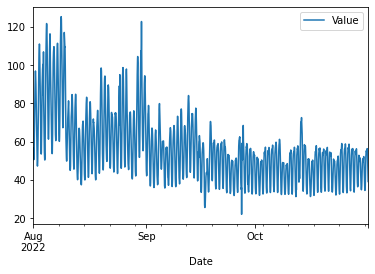

In [3]:
df = pd.read_csv('peats2.csv', header=0)

df['Date'] = pd.to_datetime(df.Date , format = '%m/%d/%Y %H:%M')

df.index = df.Date
df.info()
data = df.drop(['Date'], axis=1)
data.info()

data.plot()
pyplot.show()

In [3]:
#def split_data(data, split_date):
    #return data[data.index <= split_date].copy(), \
           #data[data.index >  split_date].copy()

#def limit(data, frm, to):
    #return data[(data.index>=frm)&(data.index<to)]

In [4]:
#creating the train and validation set
train = data[:int(0.6*(len(data)))]
test = data[int(0.6*(len(data))):]

In [5]:
model_A = sm.tsa.statespace.SARIMAX(data,
                                order=(1,1,1),
                                seasonal_order=(0,0,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_A = model_A.fit()
print('AIC =', results_A.aic) #AIC
#result_ARIMA = results.forecast(steps=test.shape[0])
forecast_A = results_A.forecast(steps=test.shape[0])

D:\Users\Krawczyk\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
D:\Users\Krawczyk\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


AIC = 9886.192171553244


In [11]:
df1

,ds,y
0,2022-08-01 00:00:00,56.569
1,2022-08-01 01:00:00,53.494
2,2022-08-01 02:00:00,51.680
3,2022-08-01 03:00:00,50.587
4,2022-08-01 04:00:00,50.883
...,...,...
1319,2022-09-24 23:00:00,37.007
1320,2022-09-25 00:00:00,34.760
1321,2022-09-25 01:00:00,33.011
1322,2022-09-25 02:00:00,32.390


In [14]:
df1

,ds,y
0,2022-08-01 00:00:00,56.569
1,2022-08-01 01:00:00,53.494
2,2022-08-01 02:00:00,51.680
3,2022-08-01 03:00:00,50.587
4,2022-08-01 04:00:00,50.883
...,...,...
1319,2022-09-24 23:00:00,37.007
1320,2022-09-25 00:00:00,34.760
1321,2022-09-25 01:00:00,33.011
1322,2022-09-25 02:00:00,32.390


In [13]:
train

,Value
Date,
2022-08-01 00:00:00,56.569
2022-08-01 01:00:00,53.494
2022-08-01 02:00:00,51.680
2022-08-01 03:00:00,50.587
2022-08-01 04:00:00,50.883
...,...
2022-09-24 23:00:00,37.007
2022-09-25 00:00:00,34.760
2022-09-25 01:00:00,33.011


In [7]:
#creating the train and validation set



#invert columns
cols = train.columns.tolist()
cols = cols[-1:] + cols[:-1]
df1 = train[cols]
df1.rename(columns = {'Value':'y'}, inplace = True)

df1 = df1.reset_index(level = 0)
df1.rename(columns = {'Date':'ds'}, inplace = True)

print(df1)
model_P = Prophet(interval_width=0.95)
model_P.fit(df1)
future_dates = model_P.make_future_dataframe(periods=test.shape[0], freq ='H')
results_P = model_P.predict(future_dates[train.shape[0]:])
forecast_P = results_P.set_index('ds').yhat

                      ds       y
0    2022-08-01 00:00:00  56.569
1    2022-08-01 01:00:00  53.494
2    2022-08-01 02:00:00  51.680
3    2022-08-01 03:00:00  50.587
4    2022-08-01 04:00:00  50.883
...                  ...     ...
1319 2022-09-24 23:00:00  37.007
1320 2022-09-25 00:00:00  34.760
1321 2022-09-25 01:00:00  33.011
1322 2022-09-25 02:00:00  32.390
1323 2022-09-25 03:00:00  31.838

[1324 rows x 2 columns]


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
D:\Users\Krawczyk\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Users\Krawczyk\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Users\Krawczyk\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [ ]:
#Use the cell above
#model_P = Prophet(interval_width=0.95)
#model_P.fit(pd.DataFrame({'ds': train.index, 'y':train}))
#future_dates = model_P.make_future_dataframe(periods=test.shape[0], freq='H')
#results_P = model_P.predict(future_dates[train.shape[0]:])
#forecast_P = results_P.set_index('ds').yhat
#model_P.make_seasonality_features(period=24*7)

In [48]:
def to_X(data):
    return pd.Series(data.index).apply(
        lambda x: (x - data.index[0]).components.hours) \
                                .values \
                                .reshape(-1,1)

model_X = xgb.XGBRegressor(n_estimators=30)
model_X.fit(to_X(train), train.values,
        eval_set=[(to_X(train), train.values), (to_X(test), test.values)],
        early_stopping_rounds=50, #stop if 50 consequent rounds without decrease of error
        verbose=False) # Change verbose to True if you want to see it train

forecast_X = model_X.predict(to_X(test))

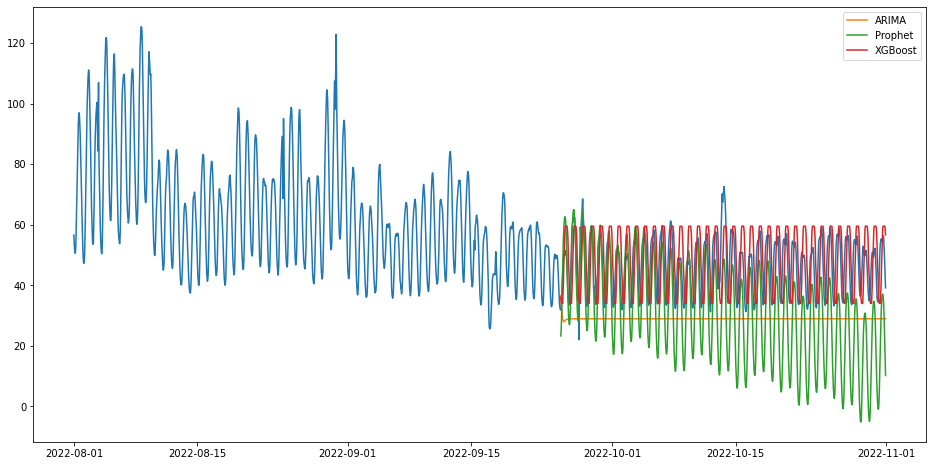

In [49]:
plt.figure(figsize=(16,8))
plt.plot(pd.concat([train,test]))
plt.plot(test.index, forecast_A, label='ARIMA')
plt.plot(test.index, forecast_P, label='Prophet')
plt.plot(test.index, forecast_X, label='XGBoost')
plt.legend()